In [1]:
# Cleaning Data

# Create target object and call it y

# Create X

# Split into validation and training data

# Specify Model

# Fit Model

# Make validation predictions and calculate mean absolute error

# Show a prediction result and real data.

### Importing libraries and Reading the data.

In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reduce the level of the axis logger to error:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [3]:
# Impoirting the dataset
house_prices_dataset_path = "./data/house-prices-advanced-regression-techniques/sample_submission.csv"
house_prices_test_path = "./data/house-prices-advanced-regression-techniques/test.csv"
house_prices_train_path = "./data/house-prices-advanced-regression-techniques/train.csv"
house_data_discription_path = "./data/house-prices-advanced-regression-techniques/data_description.txt"

house_prices = pd.read_csv(house_prices_dataset_path)
house_prices_test = pd.read_csv(house_prices_test_path)
house_prices_train = pd.read_csv(house_prices_test_path)

In [4]:
# Exporting the data (name of columns) to .xlsx file to more convenient work.
df = pd.DataFrame(house_prices_train.columns)
df.to_excel('./auxiliary_files/show_columns.xlsx', sheet_name='Column Names')

### Class

In [5]:
class Nan_counter:
    """Counting NaN(true) and NaN(false) values"""  
    def __init__(self, data_set):
        self.data = data_set

    def is_nan(self, col_name):
        """returning number of the NaN cells. In view True and False:
        True     1352
        False     107
        Name: column_name, dtype: int64"""
        return pd.isnull(self.data[self.col_name]).value_counts()
    
    def missing_values(self, accuracy):
        """accuracy in percentage
        #.missing_values(.01) - .01 is an accuracy in percent. 
        IOW, takes all values that less then .01 percent."""
        i = self.data.isnull().sum()
        j = len(self.data)
        y = round(i/j, 2)  
        return dict(y[y <= accuracy])

In [6]:
class Nan_columns:
    """
    - Finding the column(s) in dataframe that stored need number of NaN values,
    - Create a list with those columns"""
    def __init__(self, data_set):
        self.data = data_set
        
    def min_nan_number_in_column(self, min_required_nan):
        """finding the columns that stroed NaN where each column stored less or equal then # NaN values."""
        columns_of_dataset = self.data.columns.tolist()
        best_columns = []

        for i in columns_of_dataset:
            nan_sum = self.data[f"{i}"].isna().sum()            
            if nan_sum <= min_required_nan:
                best_columns.append(i)
        
        return best_columns
    
    def bad_column(self, val):
        """Select only those columns from the dataset with too many NaN rows.
           - `val` is percentage of bad rows"""
        columns_of_dataset = self.data.columns.tolist()
        bad_columns = []

        for i in columns_of_dataset:
            nan_sum = self.data[f"{i}"].isna().sum()            
            if val <= (nan_sum / len(self.data[f"{i}"])):
                bad_columns.append(i)
        
        return bad_columns

In [7]:
class Nan_string:
    """Show the string(s) that stored NaN value(s)"""
    def __init__(self, dataframe):
        self.df = dataframe
        
    def show_nan_string_in_dataframe(self):
        """Return only those strings that contain NaN values"""
        # creating and filling a dictionary (#str: col_name)
        nan_str_col = dict([(x, self.df.columns[y]) for x, y in zip(*np.where(self.df.isna()))])
        
        # takes only keys from dictionary
        keys = list(nan_str_col.keys())

        return self.df.loc[keys]
    
    def show_nan_string_in_column(self, col_name):
        count = 0 
        missing_str = []
        for i in house_prices_test[col_name]: 
            if i != i:
                missing_str.append(house_prices_test[col_name].index[count])
            count += 1
        return missing_str
        
    def show_nan_dict(self):
        """Return only number of the string and a name of the column that string(s) storing NaN values"""
        return dict([(x, self.df.columns[y]) for x, y in zip(*np.where(self.df.isna()))])
    


In [8]:
class Missing_column:
    """Differece between two lists(dataset and custom_sample.)"""
    def find_miss_col(self, col_set_main, col_set_test):
        return set(col_set_main) - set(col_set_test)

### Review Data (Understanding the Data)
#### First things first: analysing 'SalePrice'

In [9]:
# descriptive statistics summary
house_prices['SalePrice'].describe()

count      1459.000000
mean     179183.918243
std       16518.303051
min      135751.318893
25%      168703.011202
50%      179208.665698
75%      186789.409363
max      281643.976117
Name: SalePrice, dtype: float64

In [56]:
# Check possible values and frequency for each individual value in a DF
full_dataset.dtypes.value_counts(normalize = True)

object     0.530864
int64      0.320988
float64    0.148148
dtype: float64

In [67]:
full_dataset['YearBuilt'].value_counts(normalize = True, sort=True).reset_index()

,index,YearBuilt
0,2005,0.053461
1,2006,0.048663
2,2007,0.041124
3,2004,0.030843
4,2003,0.029472
...,...,...
101,1902,0.000685
102,1896,0.000685
103,1982,0.000685
104,1880,0.000685


In [44]:
full_dataset.select_dtypes(include=["int64", "float64"])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,140,0,0,0,120,0,0,6,2010,169277.052498
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,393,36,0,0,0,0,12500,6,2010,187758.393989
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,212,34,0,0,0,0,0,3,2010,183583.683570
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,360,36,0,0,0,0,0,6,2010,179317.477511
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,82,0,0,144,0,0,1,2010,150730.079977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,0,0,0,0,6,2006,167081.220949
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,24,0,0,0,0,0,4,2006,164788.778231
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,474,0,0,0,0,0,0,9,2006,219222.423400
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,80,32,0,0,0,0,700,7,2006,184924.279659


In [36]:
# Understanding the data component
full_dataset = pd.concat([house_prices_test, house_prices.drop(columns='Id')], axis=1)
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

AttributeError: 'NoneType' object has no attribute 'value_counts'

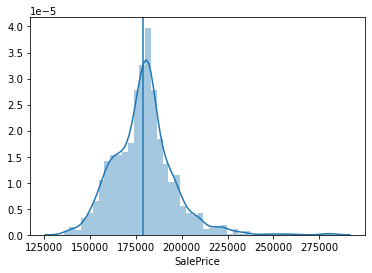

In [11]:
# histogram
graph = sns.distplot(house_prices['SalePrice'])
graph.axvline(house_prices['SalePrice'].mean())
plt.show()

In [12]:
# Skewness and Kurtosis
print(f"Skewness: {house_prices['SalePrice'].skew()}")
print(f"Kurtosis: {house_prices['SalePrice'].kurt()}")

Skewness: 0.9293599840715664
Kurtosis: 3.7947215778212335


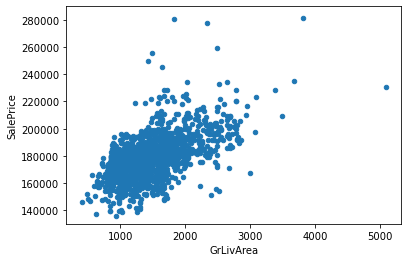

In [13]:
# scatter plot `grlivarea/saleprice`
# GrLivArea: Above grade (ground) living area square feet
var = 'GrLivArea'
data = pd.concat([house_prices['SalePrice'], house_prices_test[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(130000,290000));

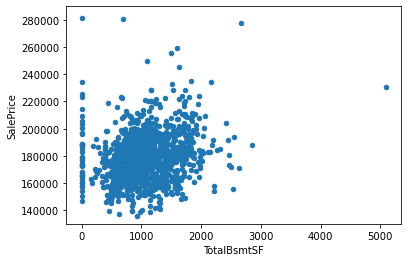

In [14]:
# scatter plot totalbsmtsf/saleprice
# TotalBsmtSF: Total square feet of basement area
var = 'TotalBsmtSF'
data = pd.concat([house_prices['SalePrice'], house_prices_test[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(130000,290000));

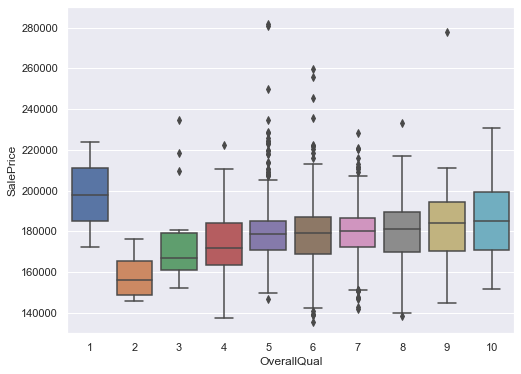

In [70]:
# box plot overallqual/saleprice
# OverallQual: Rates the overall material and finish of the house
#        10	Very Excellent
#        9	Excellent
#        8	Very Good
#        7	Good
#        6	Above Average
#        5	Average
#        4	Below Average
#        3	Fair
#        2	Poor
#        1	Very Poor

var = 'OverallQual'
data = pd.concat([house_prices['SalePrice'], house_prices_test[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))

fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=130000, ymax=290000);

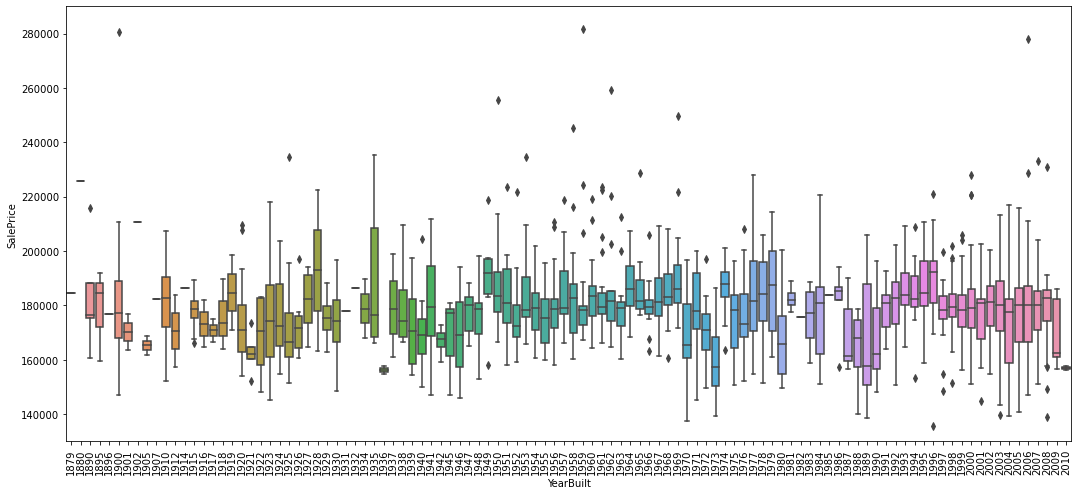

In [16]:
# box plot YearBuilt/saleprice
# YearBuilt: Original construction date
var = 'YearBuilt'
data = pd.concat([house_prices['SalePrice'], house_prices_test[var]], axis=1)

f, ax = plt.subplots(figsize=(18, 8))

fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=130000, ymax=290000);
plt.xticks(rotation=90);

### Keep calm and work smart
#### Correlation matrix (heatmap style)
>A ***heatmap*** is a graphical representation of data in which data values are represented as colors.  
That is, it uses color in order to communicate a value to the reader.  
This is a great tool to assist the audience towards the areas that matter the most when you have a large volume of data.

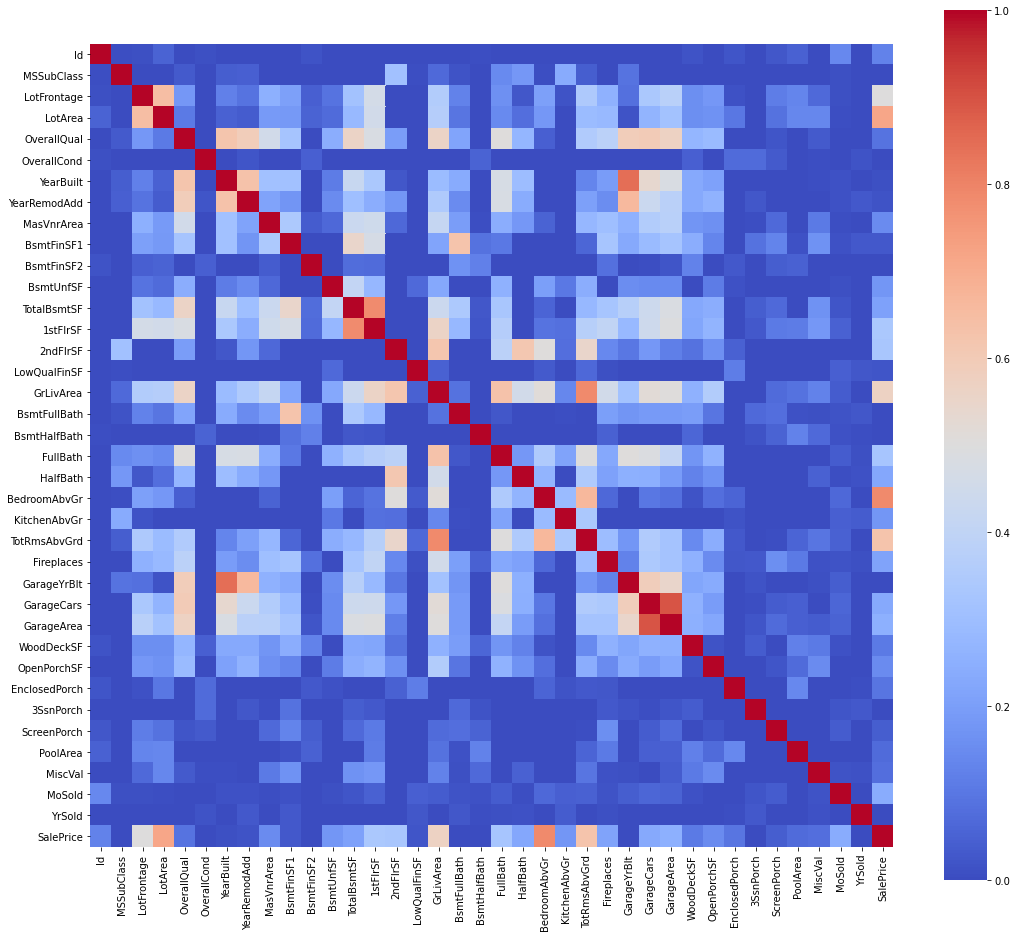

In [17]:
# correlation matrix for `full_dataset`
corrmat = full_dataset.corr()
matrix = np.tril(full_dataset.corr())
f, ax = plt.subplots(figsize=(18,16))
sns.heatmap(corrmat, vmin=0, vmax=1, square=True, cmap= 'coolwarm');

['SalePrice', 'BedroomAbvGr', 'LotArea', 'TotRmsAbvGrd', 'GrLivArea', 'LotFrontage', '1stFlrSF', '2ndFlrSF', 'FullBath', 'GarageArea']


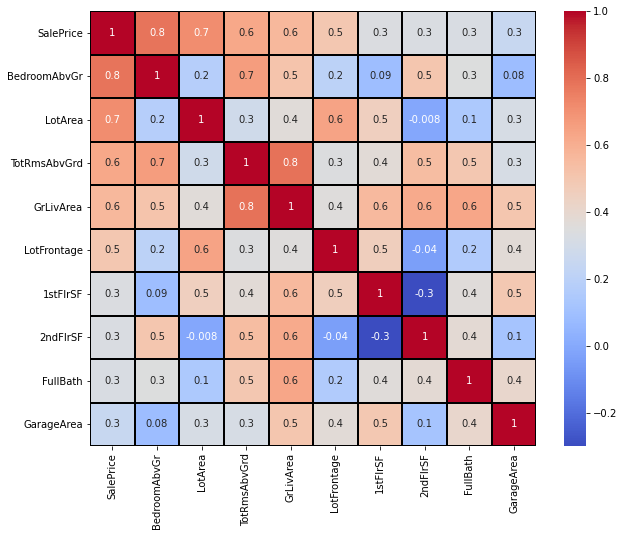

In [18]:
# saleprice correlation matrix
k = 10
# Ten best variables correlation with 'SalePrice'
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index

corrmat = full_dataset[cols].corr()
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corrmat, annot=True, fmt='.1g', cmap='coolwarm', linewidths=1, linecolor='black');

print(list(cols))

In [19]:
full_dataset[cols].isnull().sum()

SalePrice         0
BedroomAbvGr      0
LotArea           0
TotRmsAbvGrd      0
GrLivArea         0
LotFrontage     227
1stFlrSF          0
2ndFlrSF          0
FullBath          0
GarageArea        1
dtype: int64

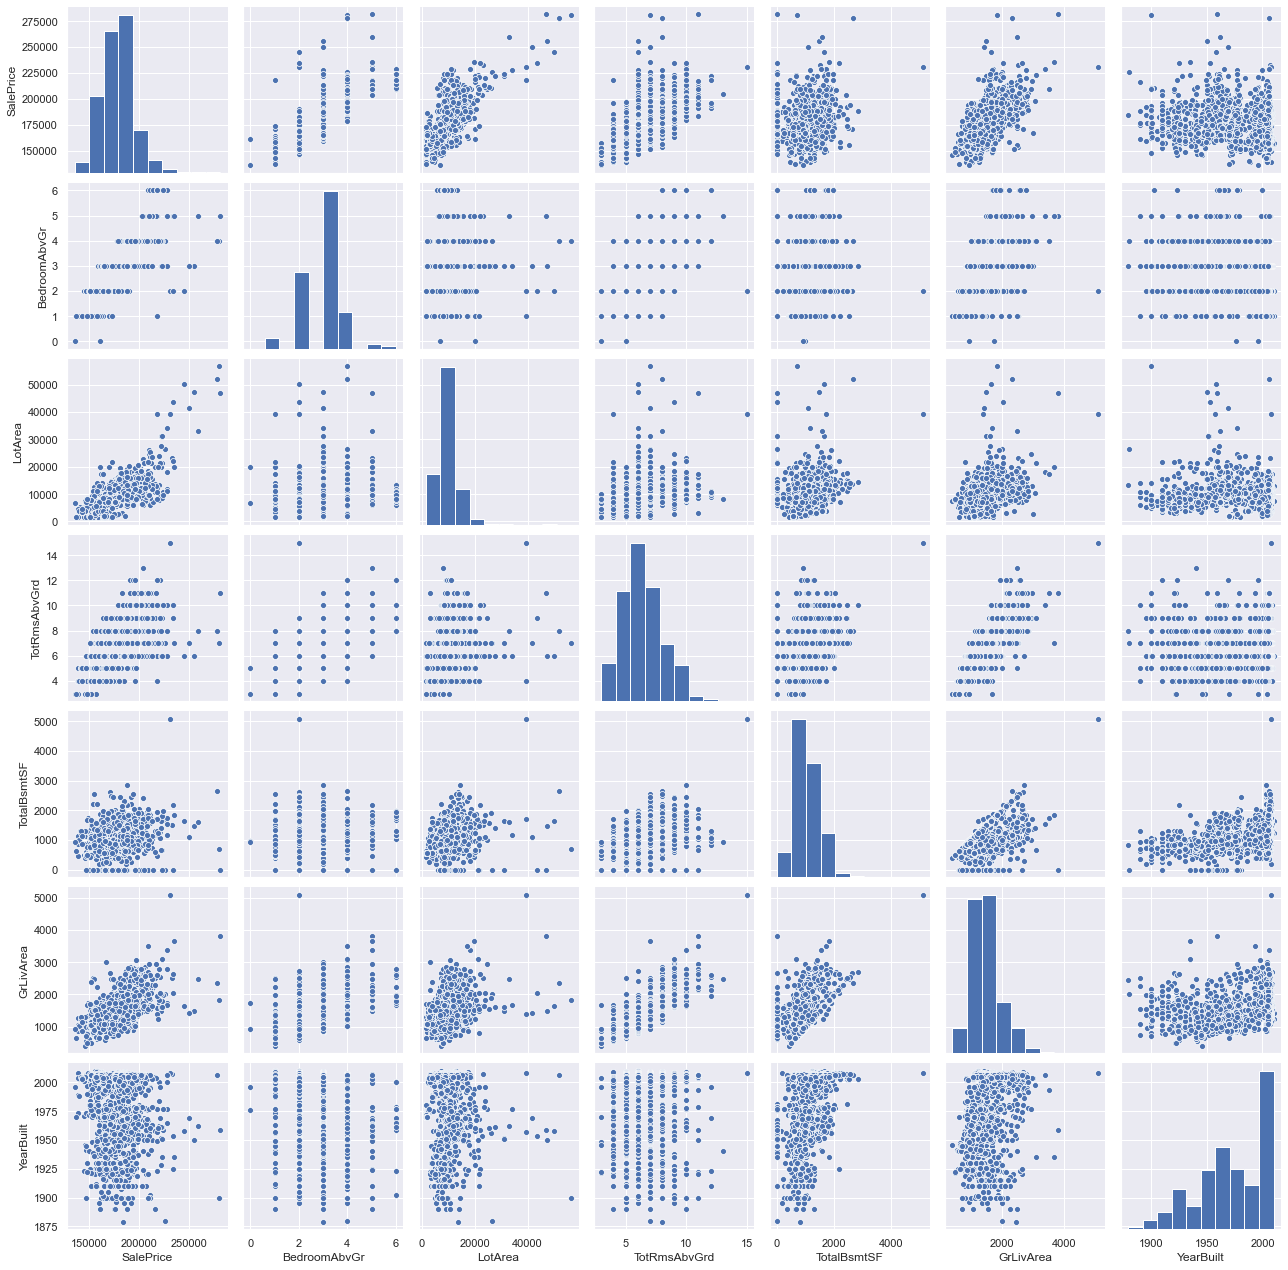

In [20]:
# scatterplot
sns.set()
cols = ['SalePrice', 'BedroomAbvGr', 'LotArea', 'TotRmsAbvGrd', 'TotalBsmtSF',  'GrLivArea', 'YearBuilt']
sns.pairplot(full_dataset[cols], height=2.5);
plt.show();

### Missing data
Important questions when thinking about missing data:

How prevalent is the missing data?
Is missing data random or does it have a pattern?

In [21]:
total = full_dataset.isnull().sum().sort_values(ascending=False)
percent = (full_dataset.isnull().sum()/full_dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total[total>0], percent[percent>0]], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageFinish,78,0.053461
GarageYrBlt,78,0.053461
GarageCond,78,0.053461
GarageQual,78,0.053461


In [34]:
# removing missing variables and individual values
full_dataset = full_dataset.drop((missing_data[missing_data['Total']>1]).index, 1)
full_dataset = full_dataset.dropna()
full_dataset.shape

(1454, 58)

In [35]:
# missing values checking
full_dataset.isnull().sum().max()

0

### Outliers

In [111]:
full_dataset[var].value_counts()

864     19
1092    18
1040    11
1456    10
936      9
        ..
1774     1
1773     1
1215     1
1771     1
2046     1
Name: GrLivArea, Length: 879, dtype: int64

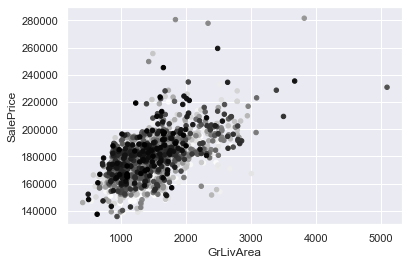

In [117]:
# bivariate analysis saleprice/grlivarea
var = 'GrLivArea'

data = pd.concat([house_prices['SalePrice'], full_dataset[var]], axis=1)

colors = np.arange(full_dataset[var].count())

data.plot.scatter(x=var, y='SalePrice', c=colors, ylim=(130000,290000));

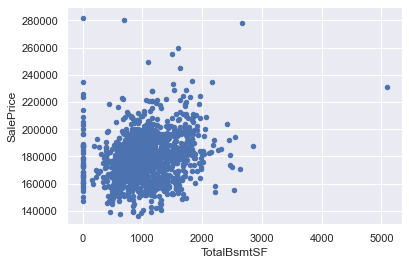

In [130]:
# bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'

data = pd.concat([house_prices['SalePrice'], full_dataset[var]], axis=1)

data.plot.scatter(x=var, y='SalePrice', ylim=(130000,290000));

In [124]:
full_dataset.sort_values(by='TotalBsmtSF', ascending=False)[:3]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1089,2550,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,17000,10,2007,New,Partial,230841.338626
19,1480,20,RL,110.0,14300,Pave,NaN,Reg,HLS,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,187823.339254
803,2264,20,RL,52.0,51974,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,New,Partial,277936.126944


In [133]:
# z = full_dataset.drop(full_dataset[full_dataset['Id'] == [1089]].index)

**Have appreciable positive skewness.**

In [ ]:
# # Show all column that contain greater than ## missing values.
# x = house_prices_test.isnull().sum()
# x[x>4]

In [ ]:
# # reviewing all columns and find number NaN strings inside.
# # - takes all columns that NaN values(number of strings) are less than .## percent (ex: .01%/1459).
# x = Nan_counter(house_prices_test).missing_values(.5)

# # Converting all got result in a list.
# features_01 = list(x)

# print(features_01)
# print('>>> Total:', len(features_01))

In [ ]:
# Select all columns which storing less or equal than # NaN strings.
features_02 = Nan_columns(house_prices_test).min_nan_number_in_column(4)

print(len(features_02))
print(features_02)

In [ ]:
# # Select only those columns from the dataset with too many(greater than .## percent from total items (ex: .01/1459)) NaN rows.
# # in this case, 1 percent = 14 missing values.
# bad_data = Nan_columns(house_prices_test[features_01]).bad_column(.01)

# print(len(bad_data))
# print(bad_data)

In [ ]:
# finding the missing values columns from dataset to restructure them to improve the forcast accuracy.
missing_columns = Missing_column().find_miss_col(house_prices_test, bad_data)

print(list(house_prices_test[bad_data].isnull().sum()))
print(house_prices_test[bad_data].shape)

In [ ]:
# # Finding the str_num and the col_name that storing NaN values.
# nan_string = Nan_string(house_prices_test[bad_data])

# # Observing those strings in DataFrame that storing NaN values. 
# # String evaluation, visually analysis.
# missing_val_list = pd.DataFrame(nan_string.show_nan_string_in_dataframe())
# missing_val_list = missing_val_list.rename_axis('ID', index='columns')
# missing_val_list

In [ ]:
# # show # of NaN strings in each column.
# for i in missing_val_list:
#     print(i+":\n", Nan_string(missing_val_list).show_nan_string_in_column(f"{i}"))

### Recognize, Fill or drop data

In [ ]:
# Concatanation several dataframes.

# clear_data = pd.concat([one_val_list, multi_val_list], axis=1)
# clear_data

# clear_data = pd.merge(missing_val_list,one_val_list,on='ID')
# clear_data

#### Hand Work (filling the miss value)

In [ ]:
# one_val_list[col_name]=one_val_list[col_name].fillna('None')

# one_val_list[col_name]=one_val_list[col_name].fillna(one_val_list[col_name].mean())

In [ ]:
# # show number of missing values for each column.
# j = house_prices_test[bad_data].isnull().sum()
# print(j)
# print('>>> Total:', len(j))

In [ ]:
# house_prices_test['GarageType'] = house_prices_test['GarageType'].fillna('NoData')
# house_prices_test['BsmtFinType1'] = house_prices_test['BsmtFinType1'].fillna('NoData')
# house_prices_test['BsmtFinType2'] = house_prices_test['BsmtFinType2'].fillna('NoData')
# house_prices_test['BsmtExposure'] = house_prices_test['BsmtExposure'].fillna('NoData')
# house_prices_test['BsmtCond'] = house_prices_test['BsmtCond'].fillna('NoData')
# house_prices_test['MasVnrType'] = house_prices_test['MasVnrType'].fillna('NoData')
# house_prices_test['MasVnrArea'] = house_prices_test['MasVnrArea'].fillna(house_prices_test['MasVnrArea'].mean())
# house_prices_test['BsmtQual'] = house_prices_test['BsmtQual'].fillna('NoData')
# house_prices_test['LotFrontage'] = house_prices_test['LotFrontage'].fillna(house_prices_test['LotFrontage'].mean())
# house_prices_test['FireplaceQu'] = house_prices_test['FireplaceQu'].fillna('NoData')

In [ ]:
# df = house_prices_test

In [ ]:
# # GarageType: Garage location
# col_name = 'GarageType'

# print("The unique elements:\n")
# print(df[col_name].value_counts())
# print("\nThe Null values:", df[col_name].isnull().sum())

In [ ]:
# # BsmtFinType1: Rating of basement finished area
# col_name = 'BsmtFinType1'

# print("The unique elements:\n")
# print(df[col_name].value_counts())
# print("\nThe Null values:", df[col_name].isnull().sum())

In [ ]:
# # BsmtFinType2: Rating of basement finished area (if multiple types)
# col_name = 'BsmtFinType2'

# print("The unique elements:\n")
# print(df[col_name].value_counts())
# print("\nThe Null values:", df[col_name].isnull().sum())

In [ ]:
# # BsmtExposure: Refers to walkout or garden level walls
# col_name = 'BsmtExposure'

# print("The unique elements:\n")
# print(df[col_name].value_counts())
# print("\nThe Null values:", df[col_name].isnull().sum())

In [ ]:
# # BsmtCond: Evaluates the general condition of the basement
# col_name = 'BsmtCond'

# print("The unique elements:\n")
# print(df[col_name].value_counts())
# print("\nThe Null values:", df[col_name].isnull().sum())

In [ ]:
# # MasVnrType: Masonry veneer type
# col_name = 'MasVnrType'

# print("The unique elements:\n")
# print(df[col_name].value_counts())
# print("\nThe Null values:", df[col_name].isnull().sum())

In [ ]:
# # MasVnrArea: Masonry veneer area in square feet
# col_name = 'MasVnrArea'

# print("The unique elements:\n")
# print(df[col_name].value_counts())
# print("\nThe Null values:", df[col_name].isnull().sum())

In [ ]:
# # BsmtQual: Evaluates the height of the basement
# col_name = 'BsmtQual'

# print("The unique elements:\n")
# print(df[col_name].value_counts())
# print("\nThe Null values:", df[col_name].isnull().sum())

In [ ]:
# # LotFrontage: Linear feet of street connected to property
# col_name = 'LotFrontage'

# print("The unique elements:\n")
# print(df[col_name].value_counts())
# print("\nThe Null values:", df[col_name].isnull().sum())

In [ ]:
# # FireplaceQu: Fireplace quality
# col_name = 'FireplaceQu'

# print("The unique elements:\n")
# print(df[col_name].value_counts())
# print("\nThe Null values:", df[col_name].isnull().sum())

In [ ]:
# j = house_prices_test.isnull().sum()
# j[j>4]

In [ ]:
# # Remove not useful columns.
# col_name = ['Alley',
#             'PoolQC',
#             'Fence',
#             'MiscFeature',
#             'GarageYrBlt',
#             'GarageFinish',
#             'GarageQual',
#             'GarageCond']

# house_prices_test = house_prices_test.drop(columns=col_name)

In [ ]:
# j = house_prices_test.isnull().sum()
# j[j>=0]

In [ ]:
# Maked a clear dataset and add it a `SalePrice` column.
# concat_sets = pd.concat([house_prices_test, house_prices], axis=1)

In [ ]:
# Remove strings with NaN values.
# clear_test_set = concat_sets.dropna()
clear_test_set

### Building a Forcasting model